# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_squared_error



# to split the data into train and test
from sklearn.model_selection import train_test_split

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# To build model for prediction

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores


from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# uncomment and run the following lines for Google Colab
#from google.colab import drive
#drive.mount('/content/drive')

## Loading the dataset

In [2]:
# read the data
data = pd.read_csv('/Users/willpayne/Downloads/Loan_Modelling.csv')
# returns the first 5 rows


data = pd.DataFrame(data)

## Data Overview

* Observations
* Sanity checks

In [3]:
data.head(5)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [4]:
data.shape

(5000, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
data.describe()

ID          Age   Experience       Income       ZIPCode  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93169.257000   
std    1443.520003    11.463166    11.467954    46.033729   1759.455086   
min       1.000000    23.000000    -3.000000     8.000000  90005.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal_Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities_Account  CD_Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

In [7]:
# let's check for duplicate observations
data.duplicated().sum()

0

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

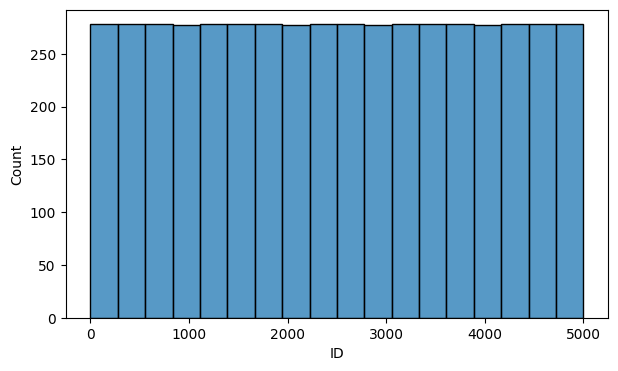

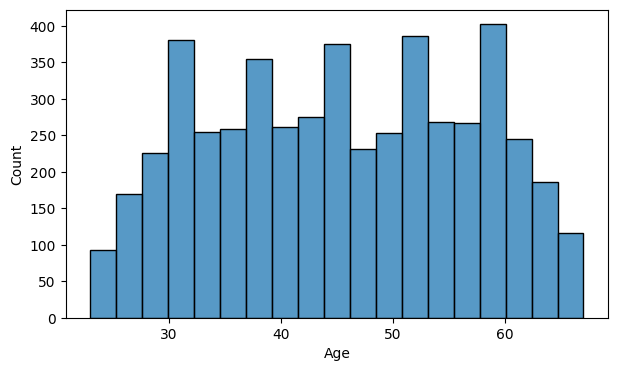

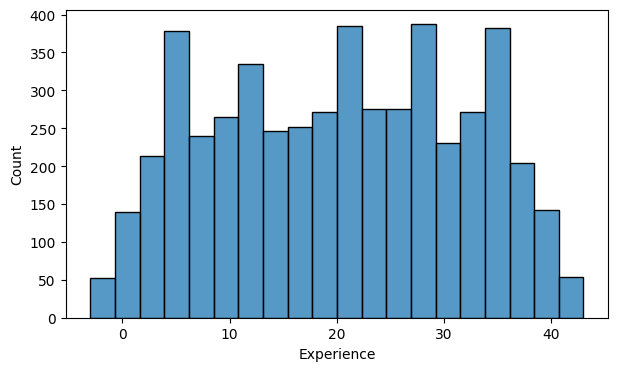

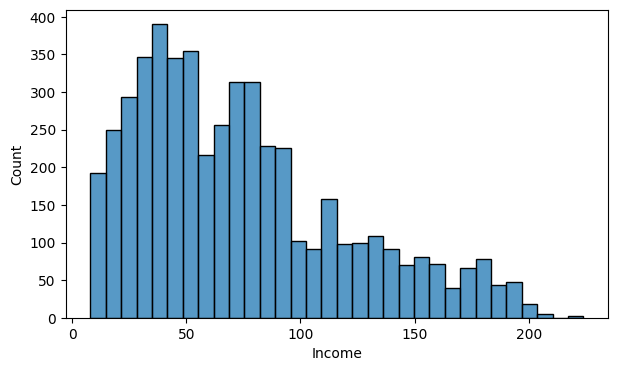

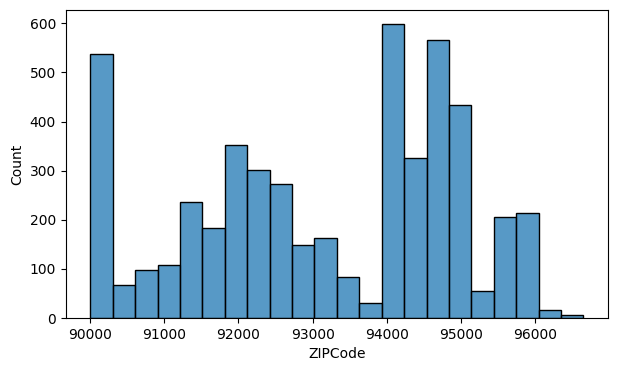

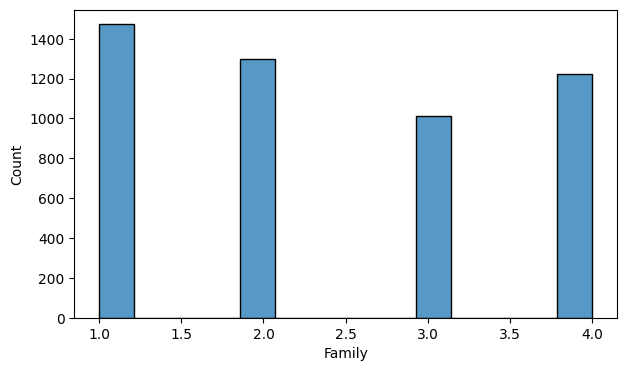

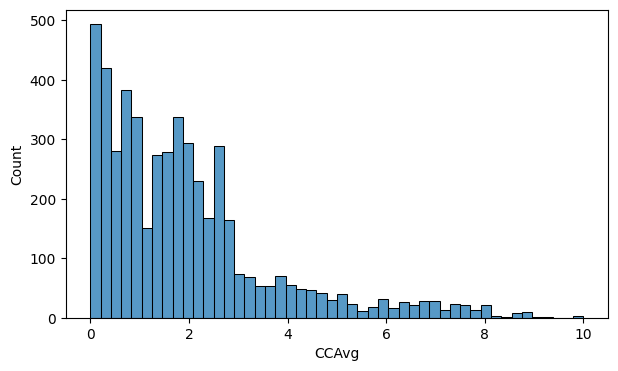

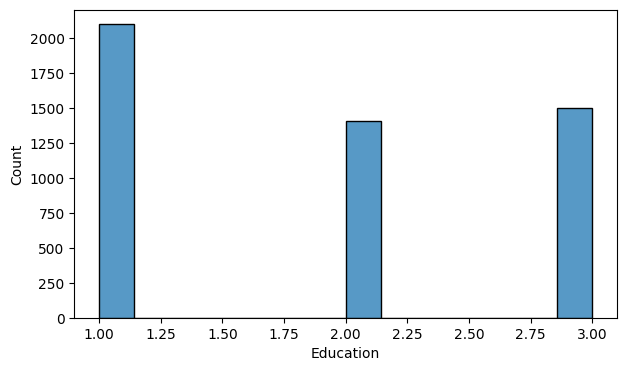

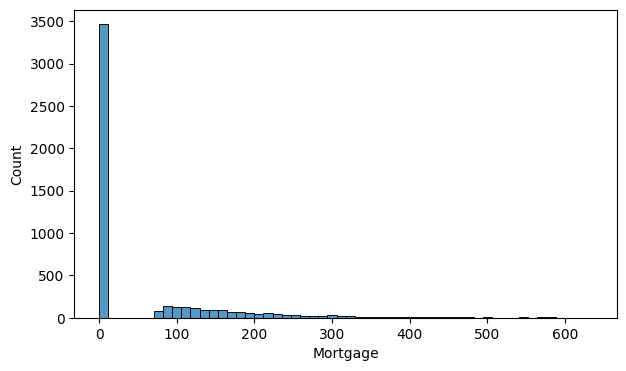

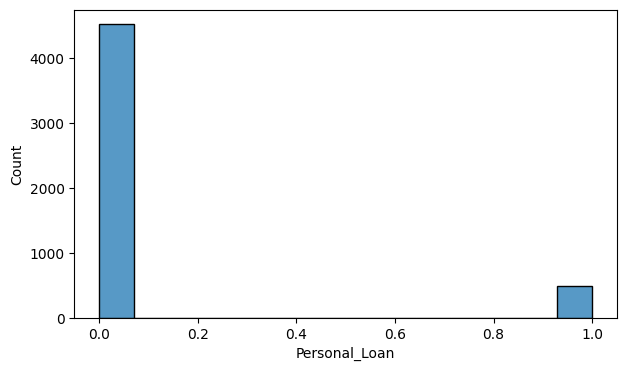

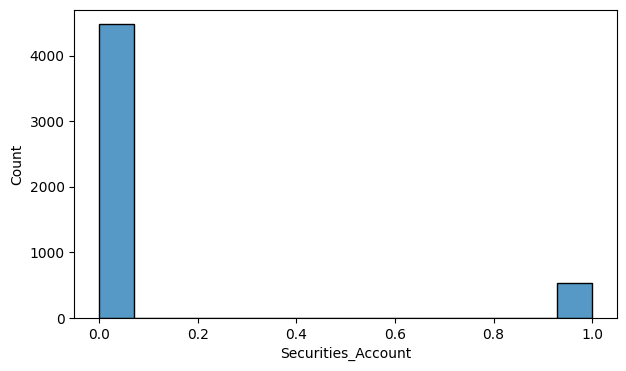

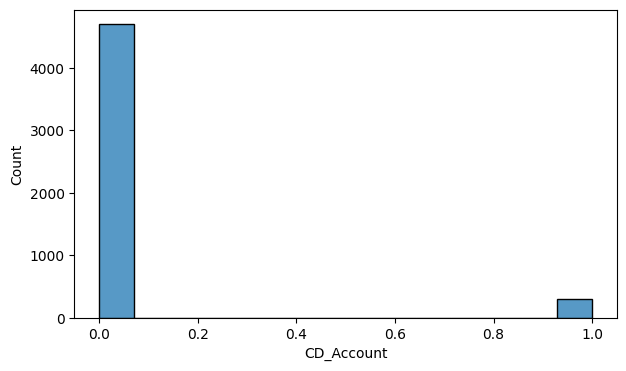

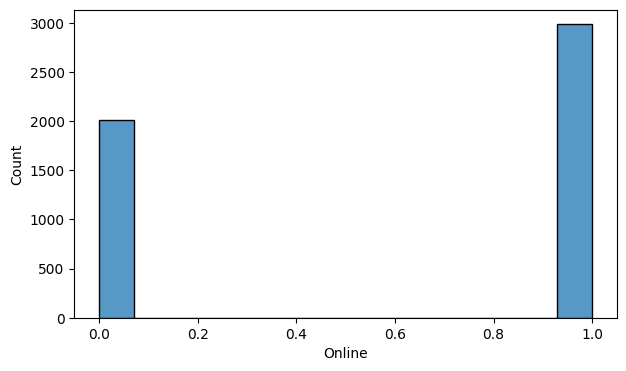

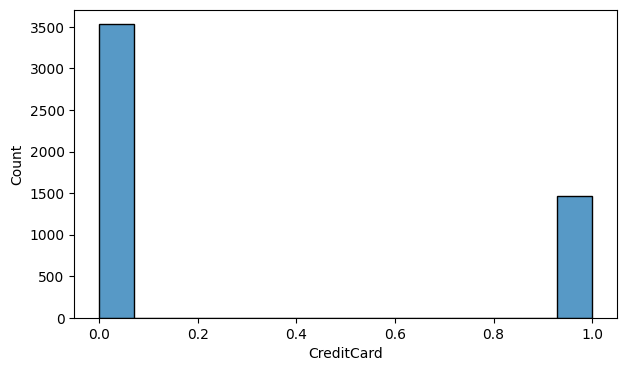

In [8]:
for i in data.columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=data, x=i)
    plt.show()

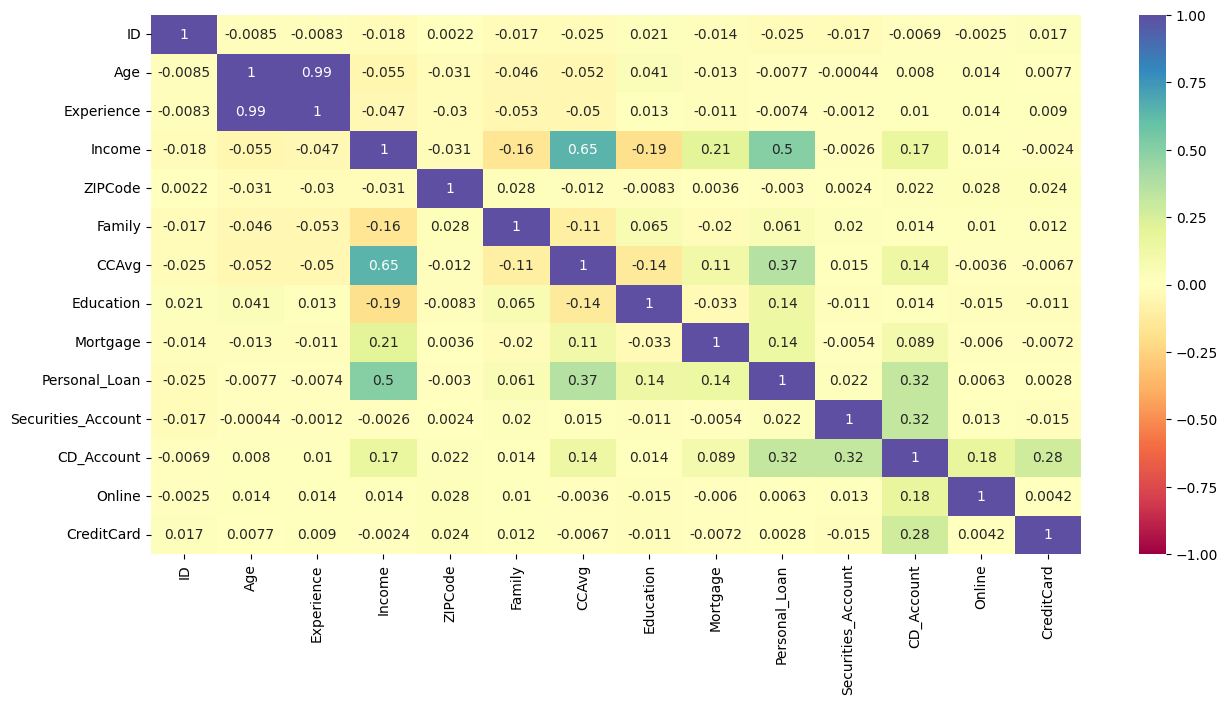

In [9]:

plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True, cmap='Spectral', vmin=-1,vmax=1)
plt.show()

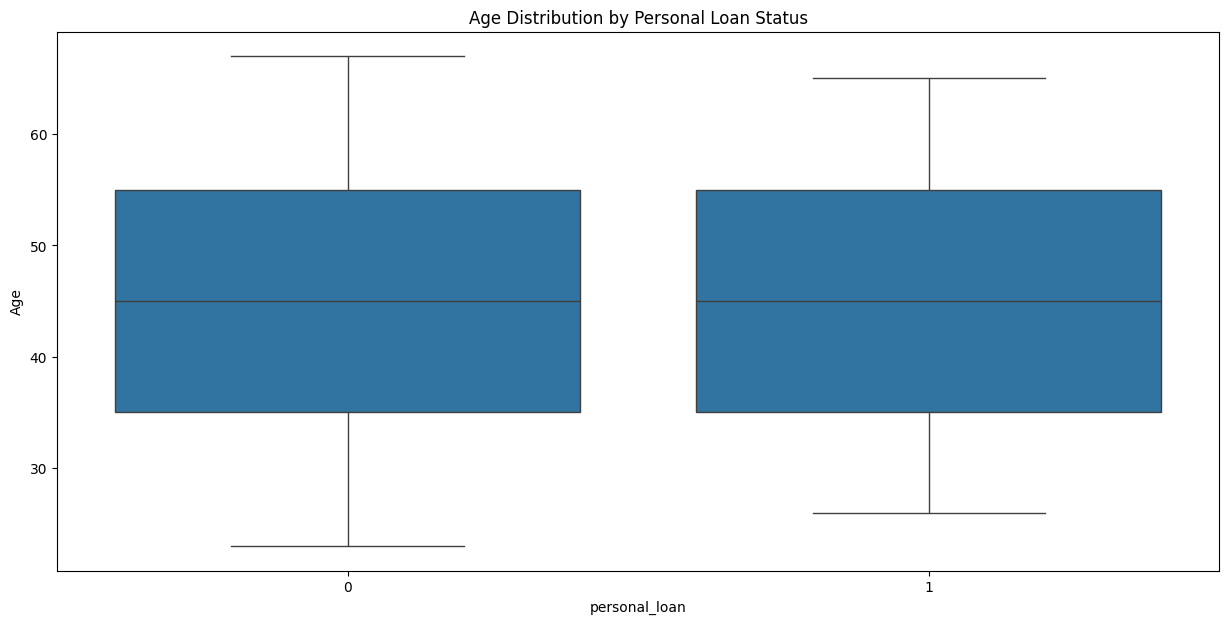

In [10]:
plt.figure(figsize=(15, 7))

sns.boxplot(x='Personal_Loan', y='Age', data=data)
plt.title('Age Distribution by Personal Loan Status')
plt.xlabel('personal_loan')
plt.ylabel('Age')

plt.show()

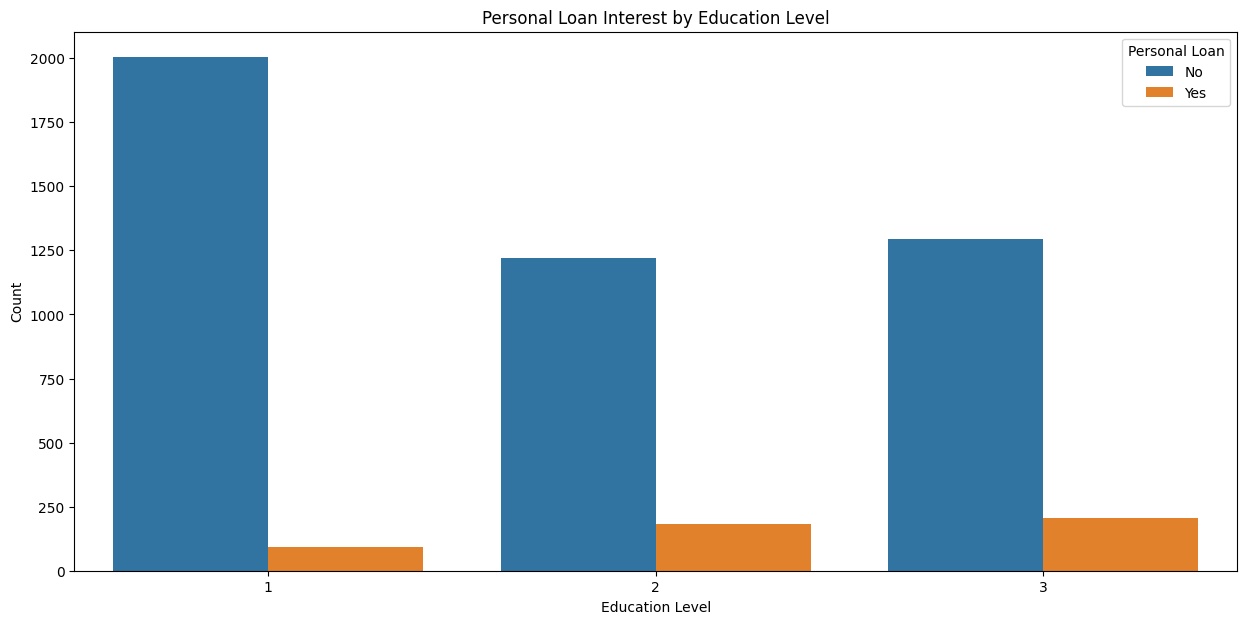

In [11]:
plt.figure(figsize=(15, 7))

sns.countplot(x='Education', hue='Personal_Loan', data=data)
plt.title('Personal Loan Interest by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Personal Loan', labels=['No', 'Yes'])

plt.show()

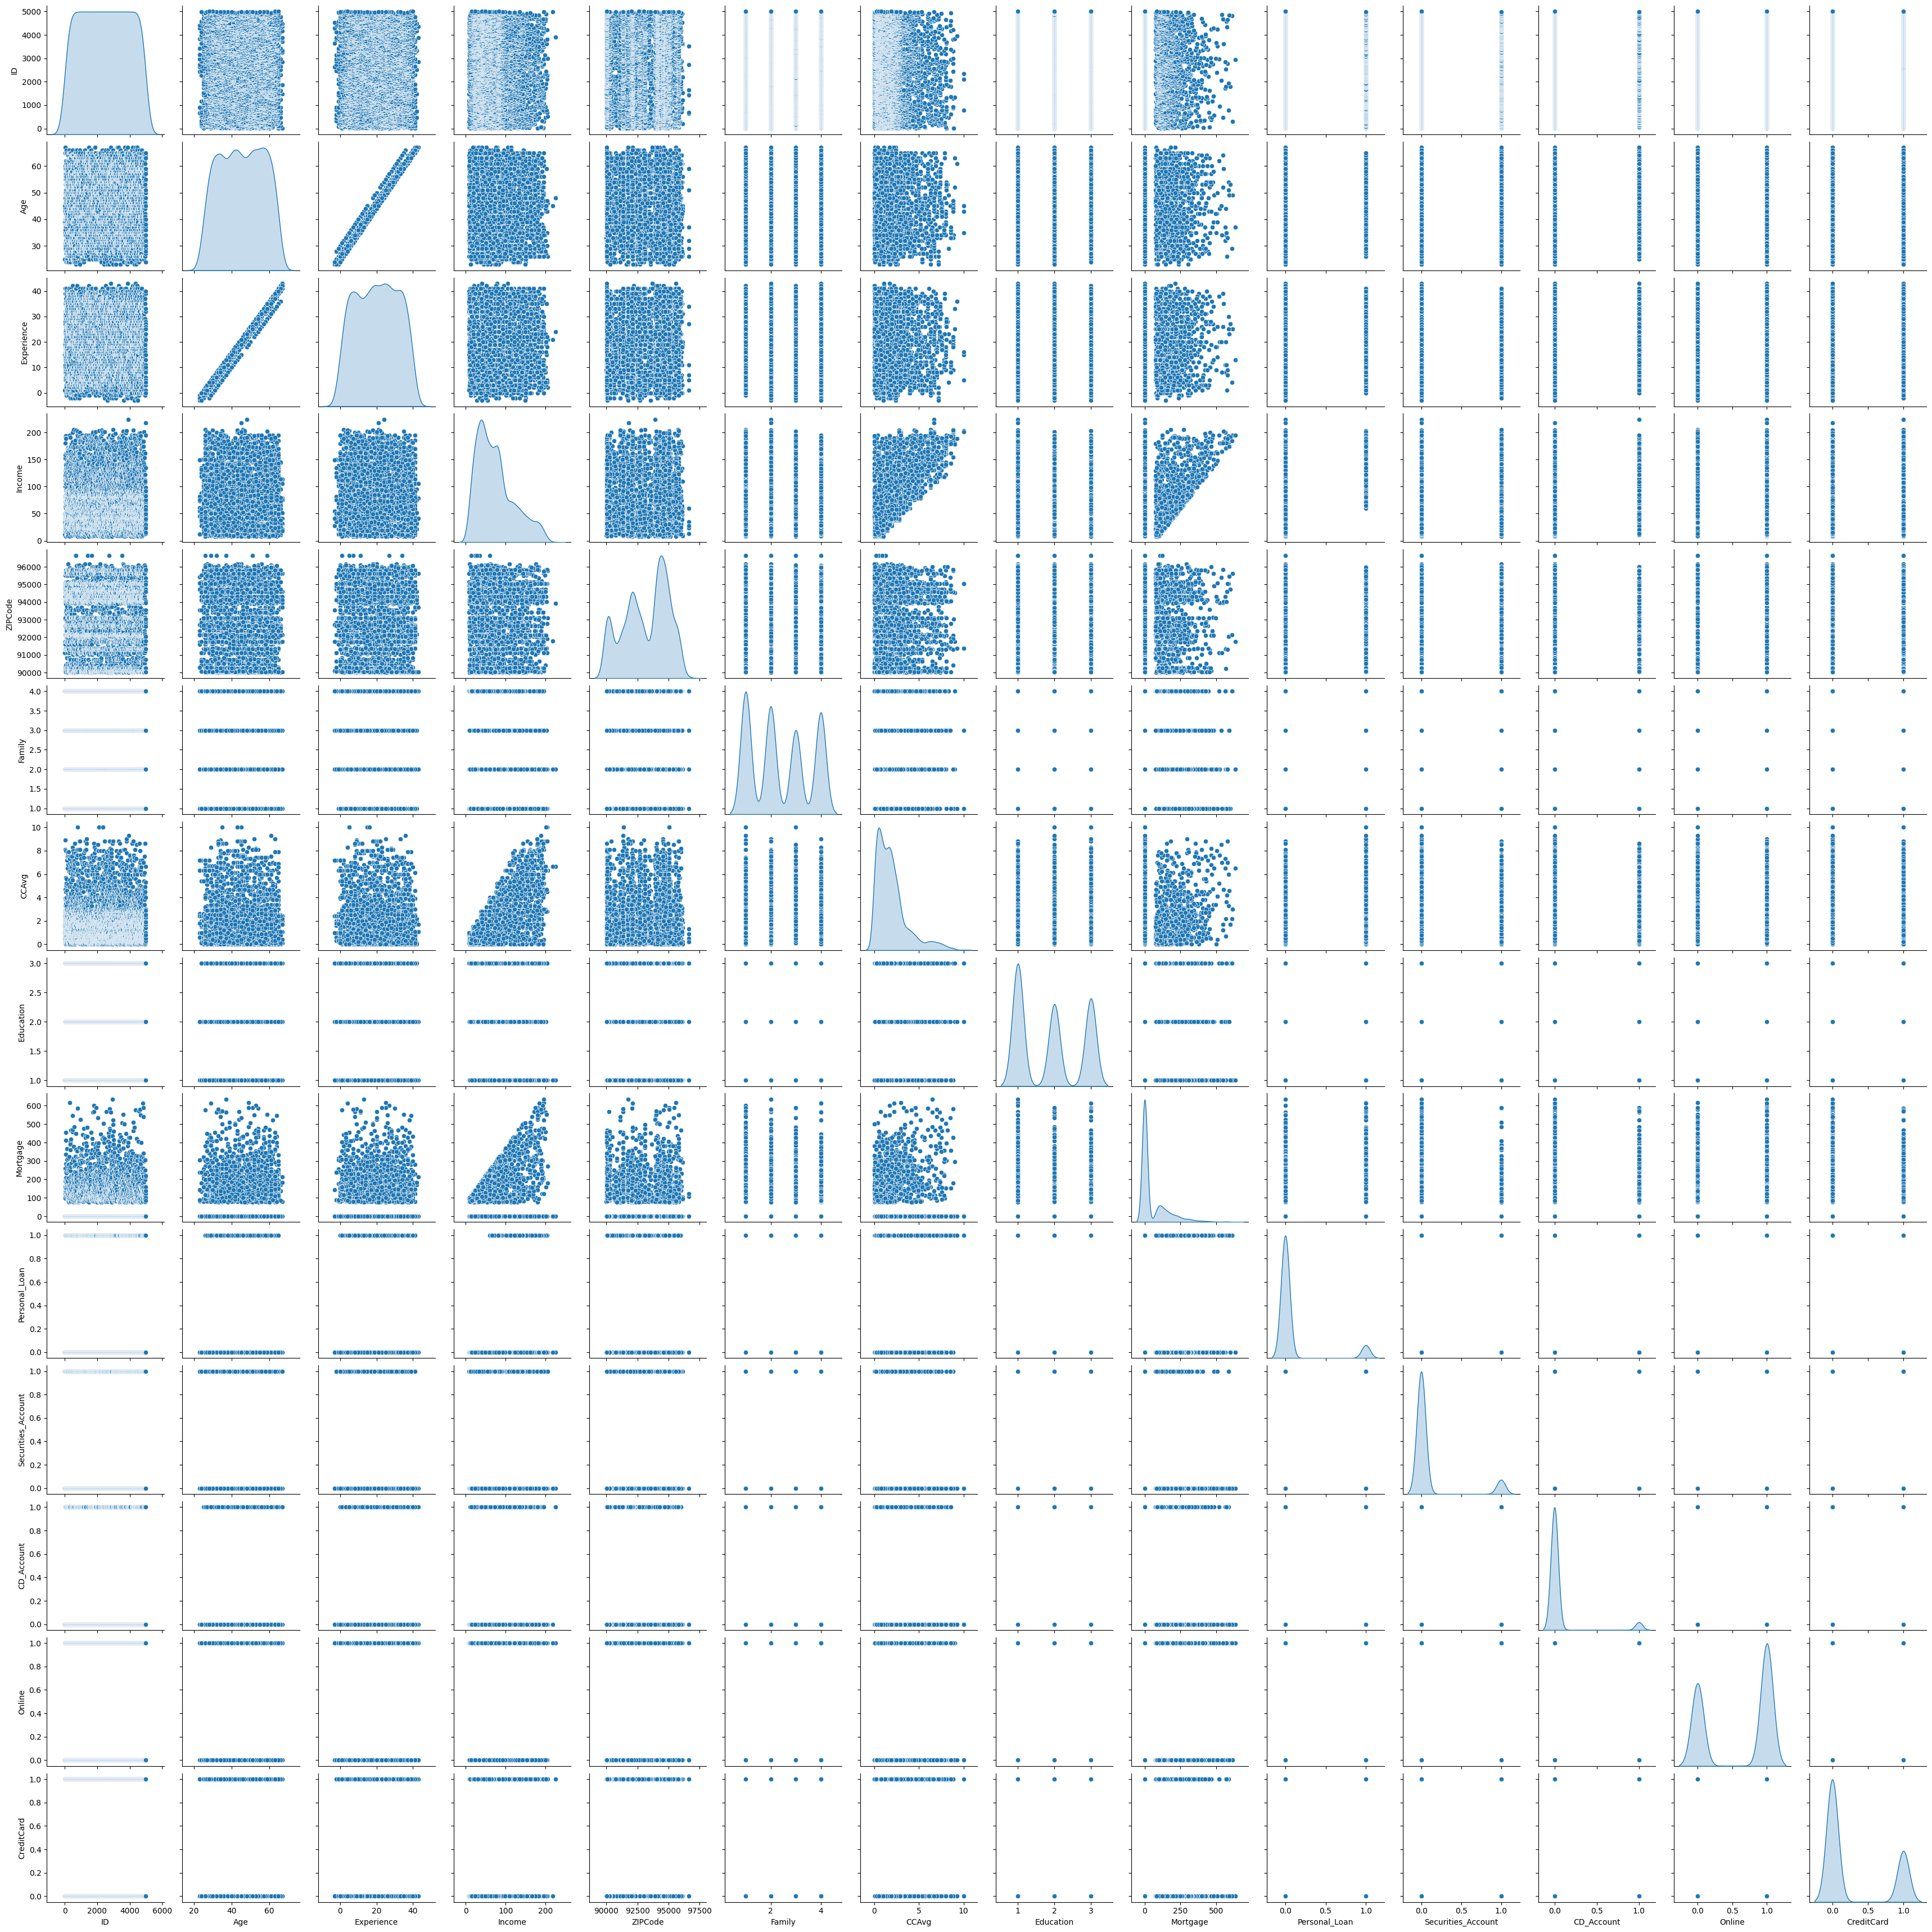

In [12]:
# selecting numerical columns
num_col = data.select_dtypes(include=np.number).columns.tolist()

sns.pairplot(data=data[num_col], diag_kind="kde")
plt.show()

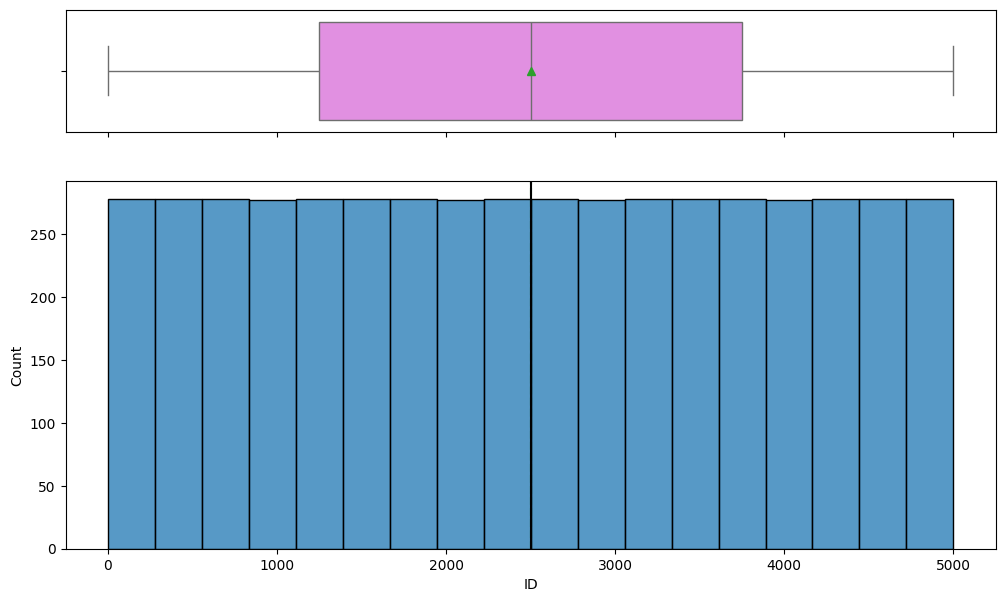

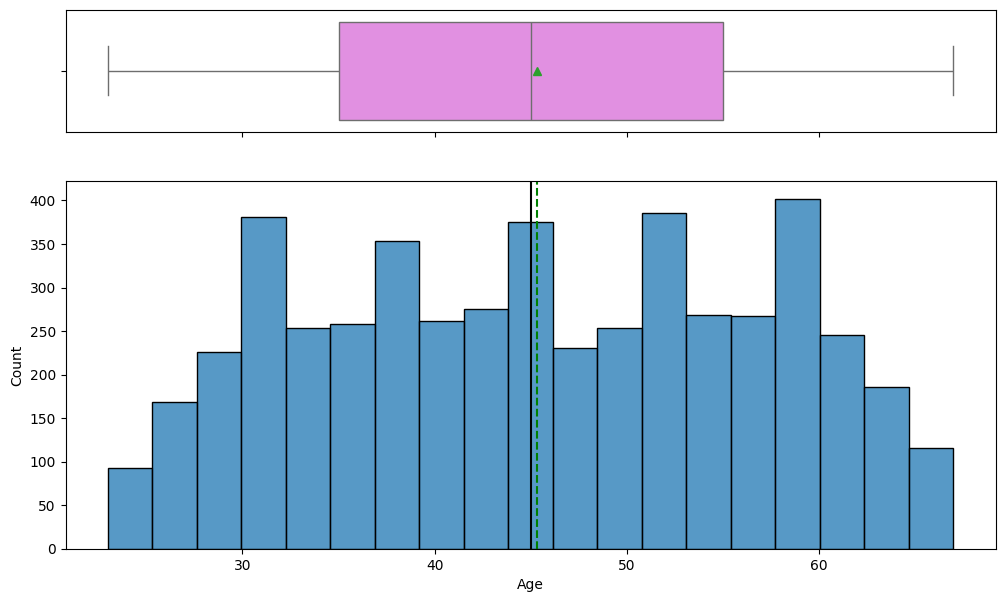

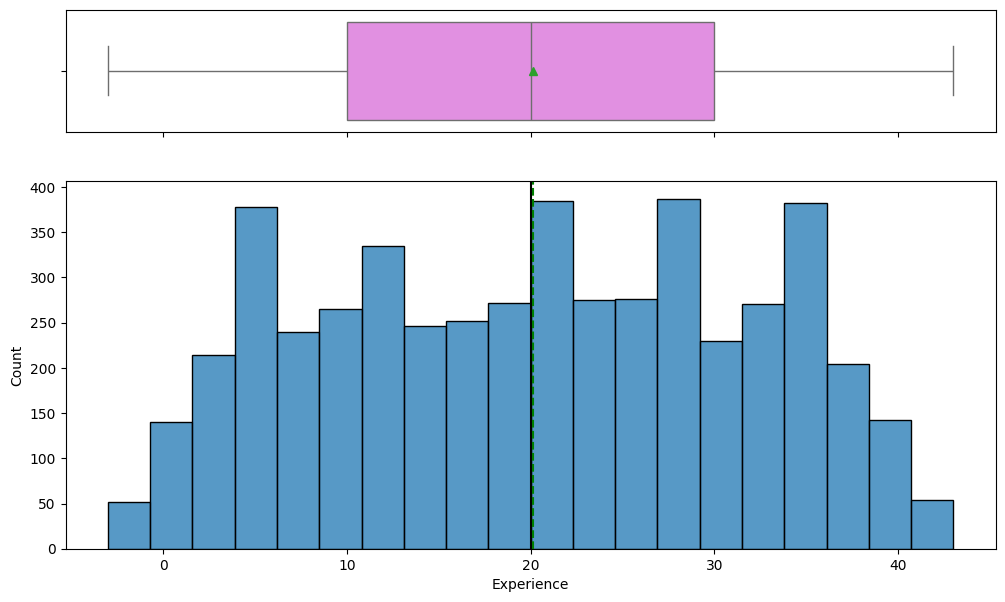

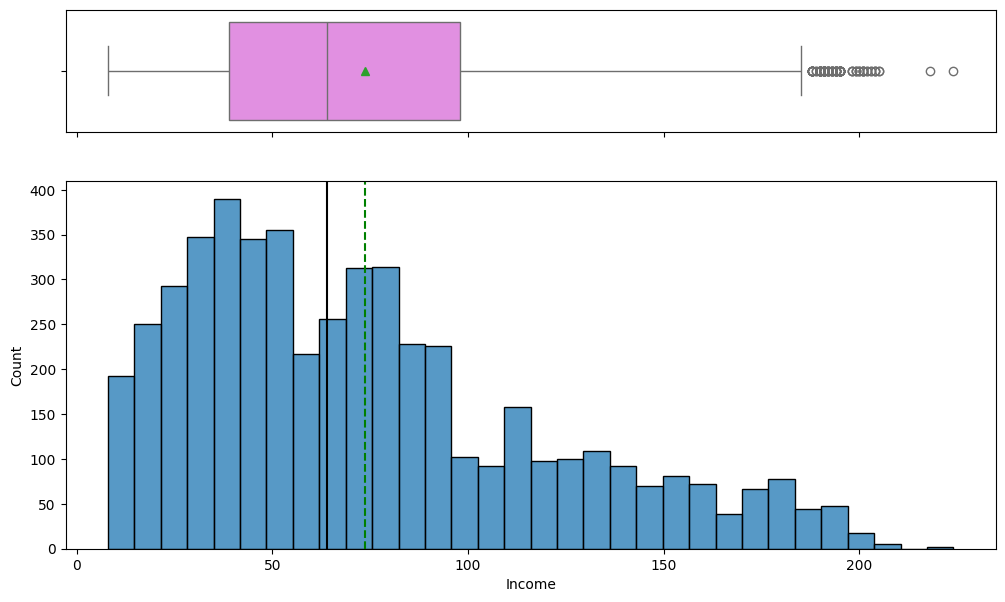

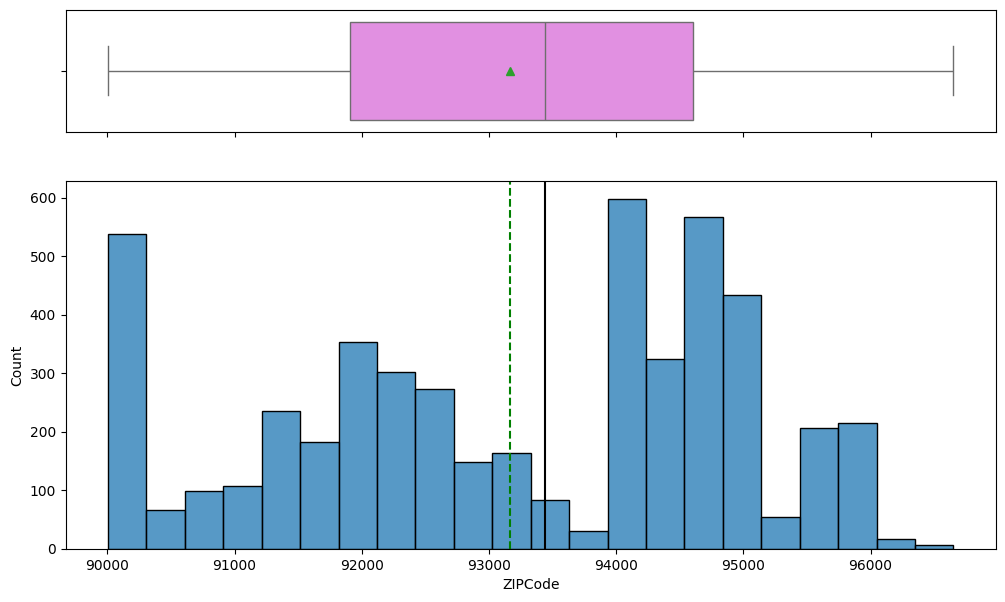

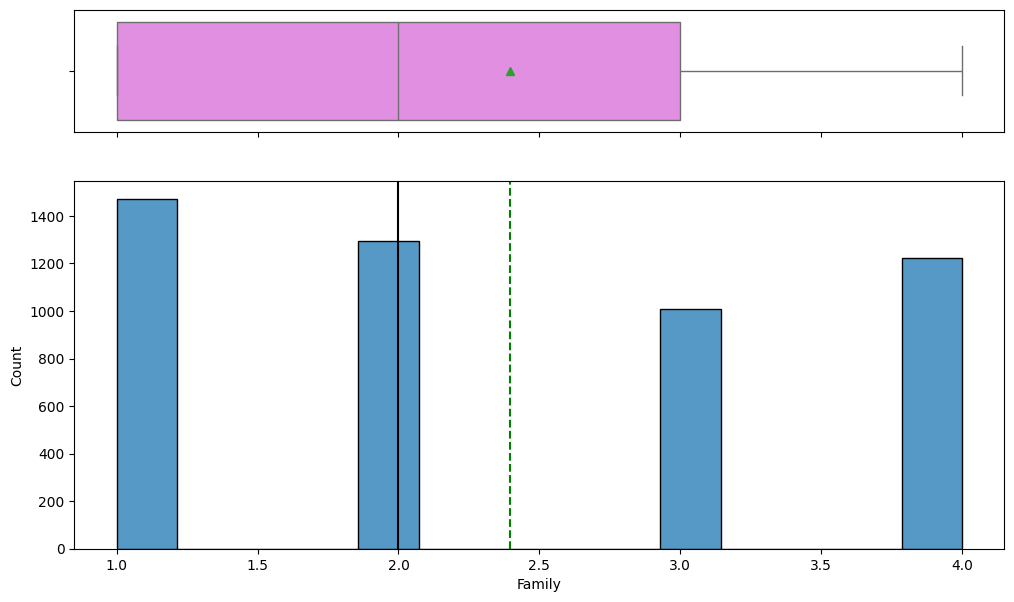

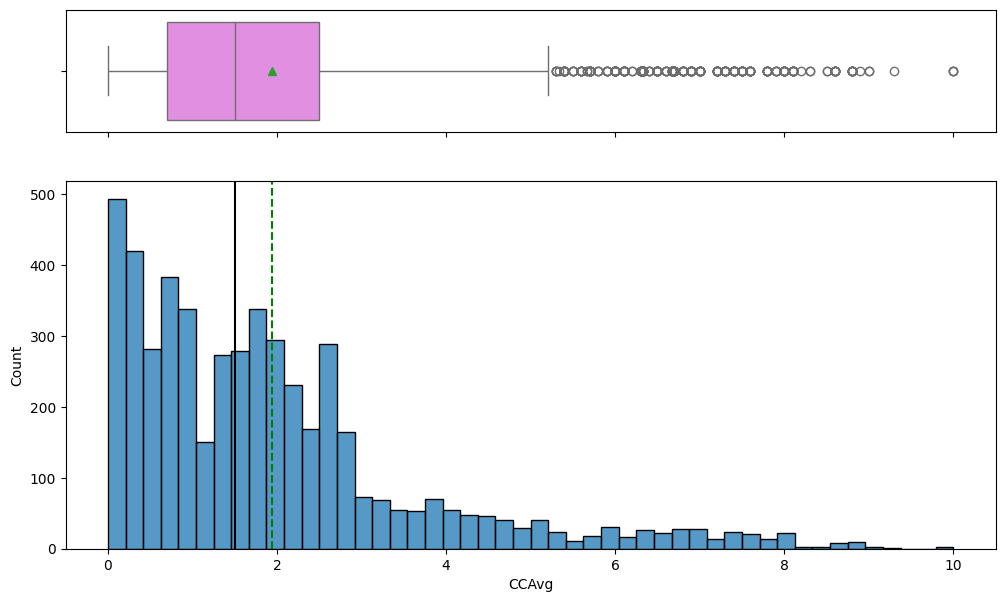

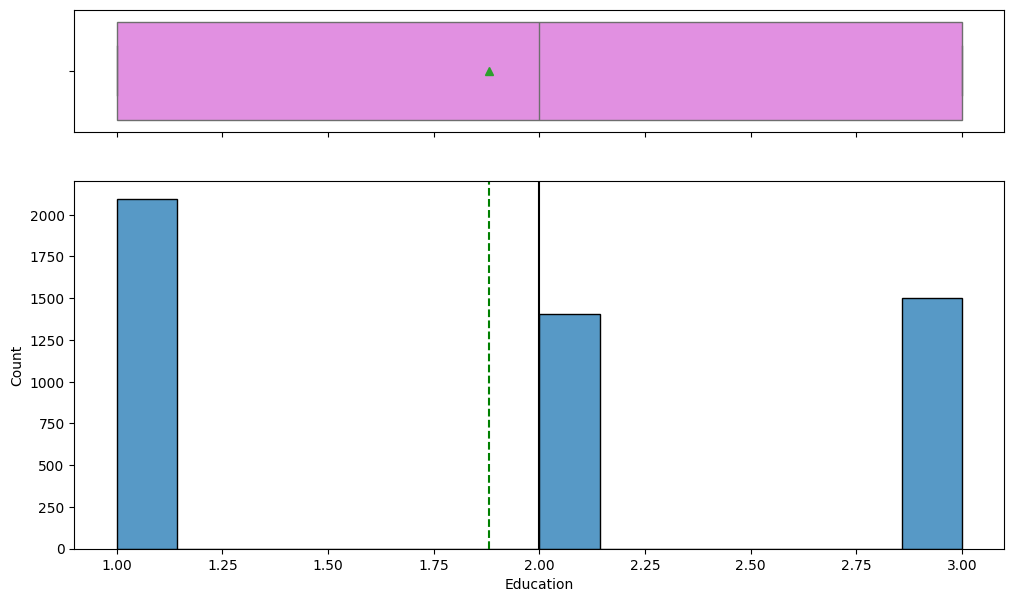

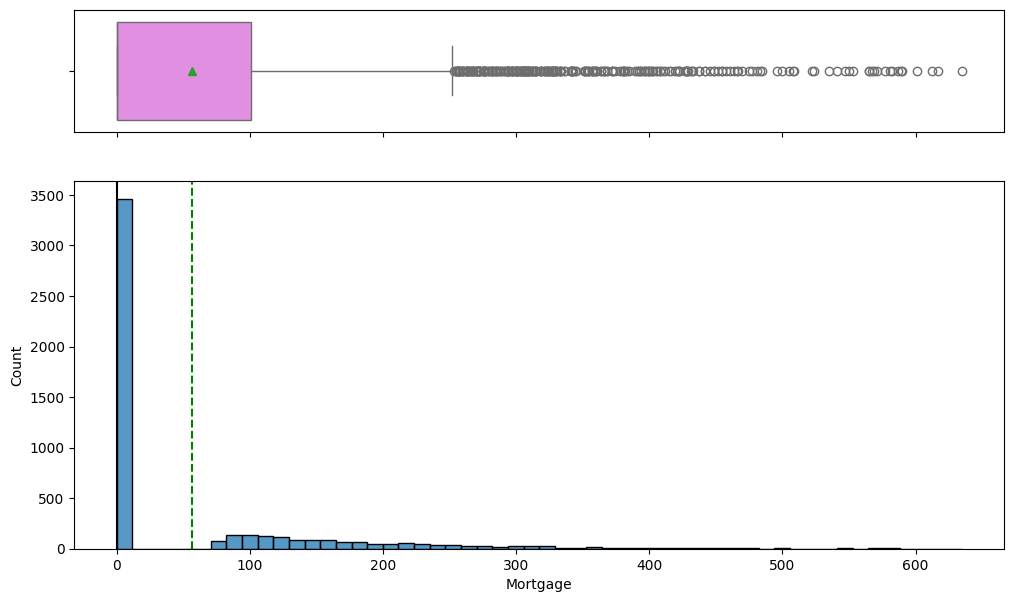

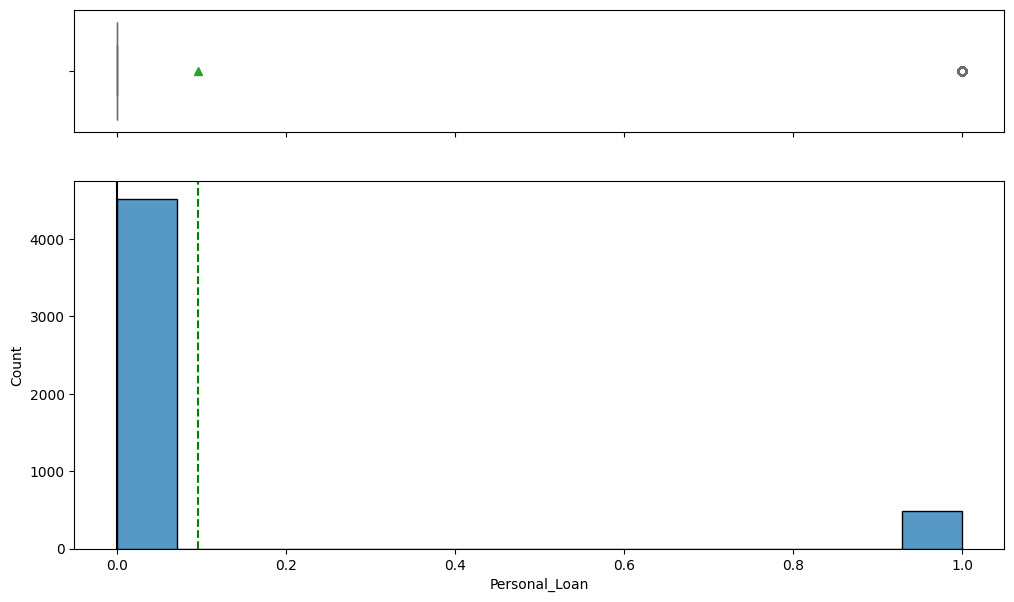

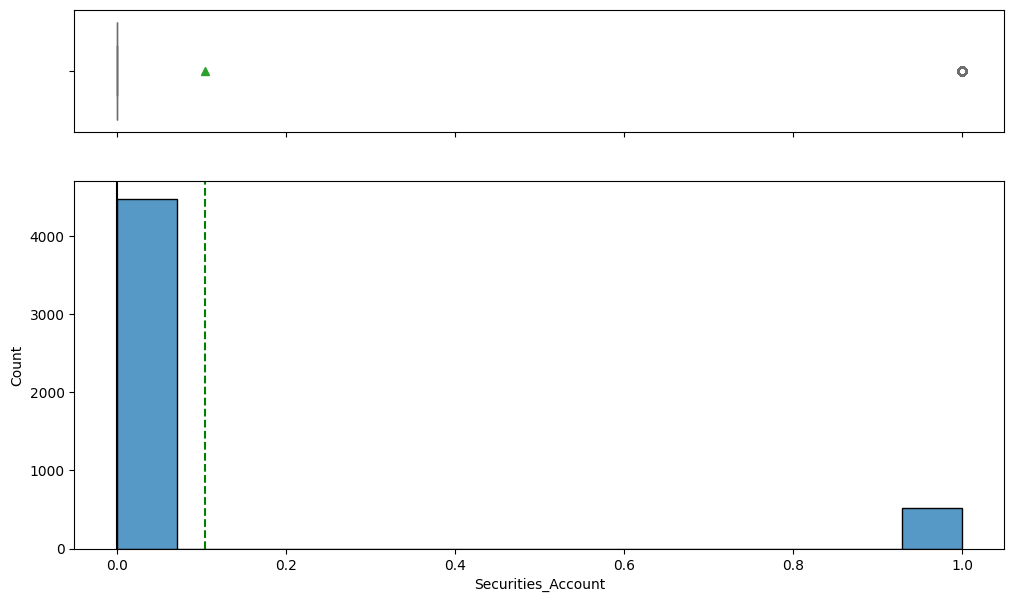

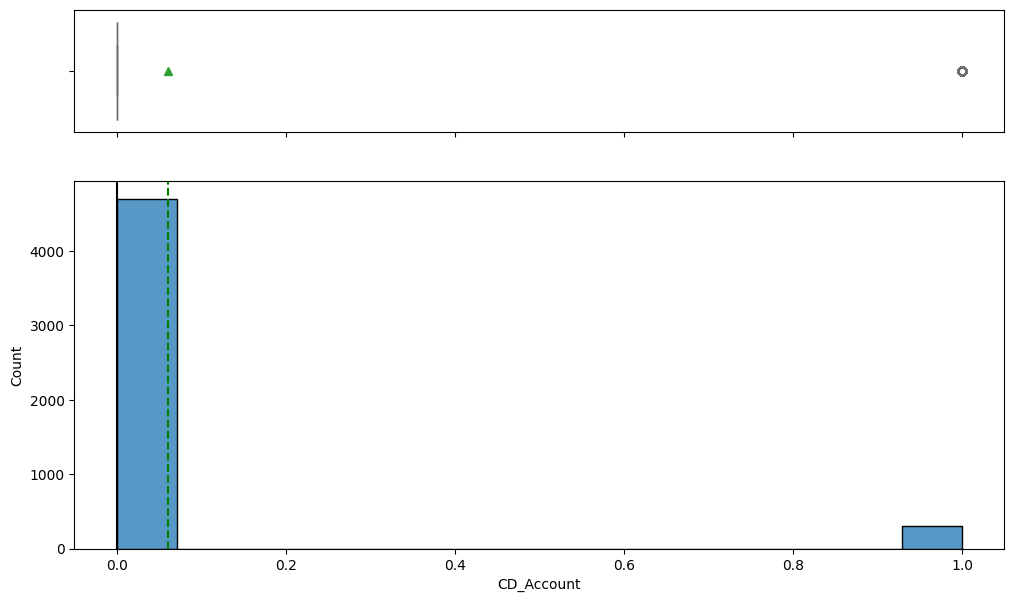

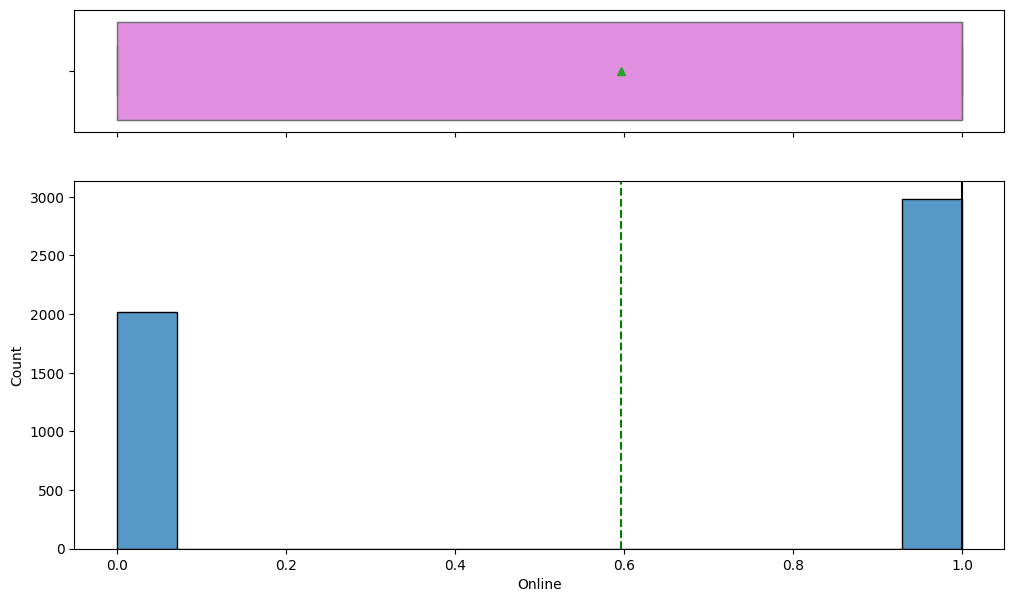

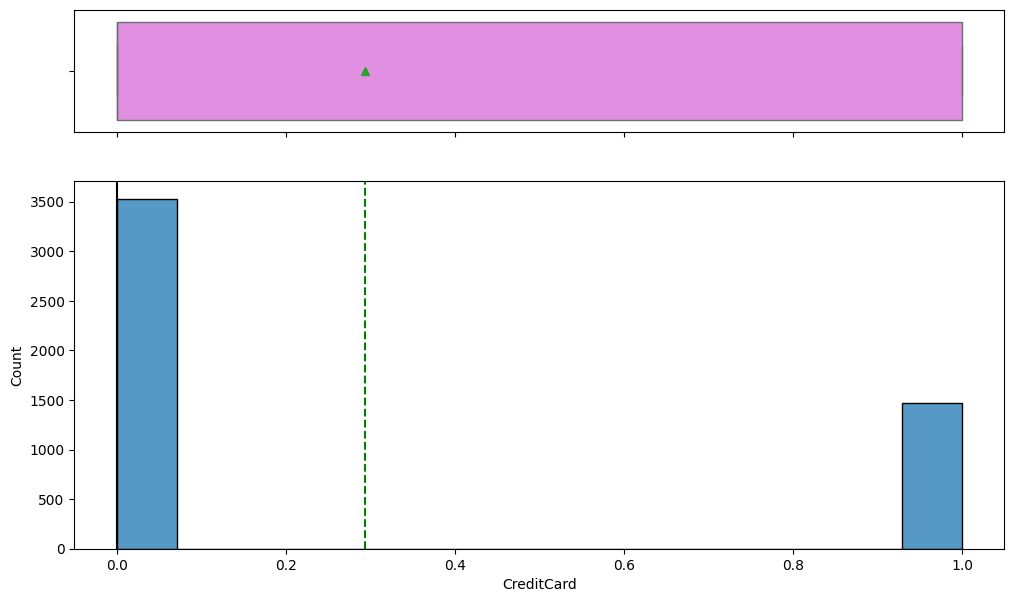

In [13]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

for item in num_col:
    histogram_boxplot(data, item)

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?

  Most of the people in this dataset do not have a mortgage. in this case we may want to remove the people who do, in order for our model to have a good fit.

2. How many customers have credit cards?

  There are 1500 customers with a credit card not with All life bank.

3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
  the attributes with strongest correlation with our target attribute personal loan are income and a credit card balance. also those who have a bank account with All life

4. How does a customer's interest in purchasing a loan vary with their age?
  The customers interest in a personal load has minor differences, the median age is very similar but those who do take personal loan are likely to be older in age. as the bottom quartile in age is closer to 27 than 25.

5. How does a customer's interest in purchasing a loan vary with their education?
  With education level you can see that interest in a personal loan is higher than the advanced degree group as they are also likely to have to higher income and higher credit card usage as well.

<Axes: xlabel='Family', ylabel='CCAvg'>

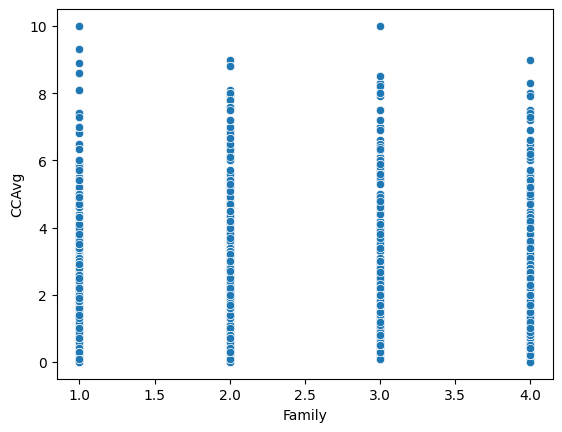

In [14]:
# @title CCAvg vs Family Size

sns.scatterplot(data=data, x="Family", y="CCAvg")

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [15]:
# Separate independent and dependent variable
X = data.drop(["Personal_Loan", "Experience"], axis=1)
Y = data["Personal_Loan"]

In [16]:
Q1 = data.quantile(0.25)  # Complete the code to find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)  # Complete the code to find the 75th percentile and 75th percentile.

IQR = Q3 - Q1               # Inter Quantile Range (75th perentile - 25th percentile)

lower = Q1 - 1.5 * IQR  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

In [17]:
from sklearn.model_selection import train_test_split

# Assuming 'X' is your features matrix and 'y' is your target variable

# Apply dummies on ZIPCode and Education
X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)

# Split data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Print the shape of train and test data
print("Shape of Training set: ", X_train.shape)
print("Shape of Test set: ", X_test.shape)

# Print the percentage of classes in training and test set
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))


Shape of Training set:  (3500, 478)
Shape of Test set:  (1500, 478)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


## Model Building

In [18]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [19]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [20]:
# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Model Evaluation Criterion

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

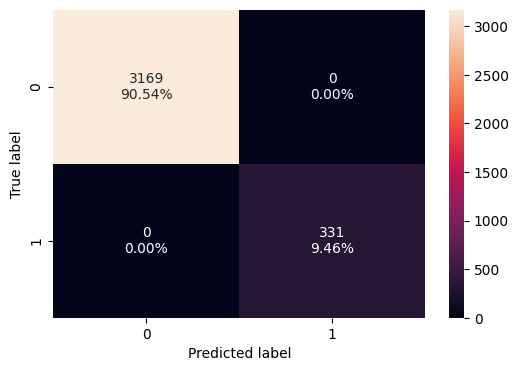

In [21]:
confusion_matrix_sklearn(model, X_train, y_train)
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_perf_train

In [22]:

decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_perf_test

Accuracy    Recall  Precision        F1
0  0.981333  0.872483   0.935252  0.902778

*


### Model Building

In [23]:
num_to_display = 10  # defining this up here so it's easy to change later

for colname in data.dtypes[data.dtypes == "object"].index:
    val_counts = data[colname].value_counts(dropna=False)  # will also show the NA counts
    print(val_counts[:num_to_display])

    if len(val_counts) > num_to_display:
        print(f"Only displaying first {num_to_display} of {len(val_counts)} values.")
    print("-" * 50, "\n")  # just for more space in between

In [24]:
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
        },
        index=[0],
    )

    return df_perf

In [25]:
# defining the dependent and independent variables
X = data.drop(["Experience"], axis=1)
y = data["Personal_Loan"]

# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

ID  Age  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25      49    91107       4    1.6          1         0   
1   2   45      34    90089       3    1.5          1         0   
2   3   39      11    94720       1    1.0          1         0   
3   4   35     100    94112       1    2.7          2         0   
4   5   35      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [26]:
X.shape

(5000, 13)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 3500
Number of rows in test data = 1500


In [28]:
# fitting a linear model
lin_reg_model1 = LinearRegression()
lin_reg_model1.fit(x_train, y_train)

LinearRegression()

In [29]:
# Checking model performance on train set
print("Training Performance:")
lin_reg_model1_perf_train = model_performance_regression(
    lin_reg_model1, x_train, y_train
)
lin_reg_model1_perf_train

Training Performance:


RMSE           MAE  R-squared  Adj. R-squared
0  1.148533e-15  9.282288e-16        1.0             1.0

In [30]:
# Checking model performance on train set
print("Training Performance:")
lin_reg_model1_perf_train = model_performance_regression(
    lin_reg_model1, x_train, y_train
)
lin_reg_model1_perf_train

Training Performance:


RMSE           MAE  R-squared  Adj. R-squared
0  1.148533e-15  9.282288e-16        1.0             1.0

In [31]:
# Checking model performance on test set
print("Test Performance:")
lin_reg_model1_perf_test = model_performance_regression(lin_reg_model1, x_test, y_test)
lin_reg_model1_perf_test

Test Performance:


RMSE           MAE  R-squared  Adj. R-squared
0  1.108386e-15  8.927820e-16        1.0             1.0

In [32]:
# defining the dependent and independent variables
X = data.drop(["Personal_Loan", "Experience"], axis=1)
y = data["Personal_Loan"]

# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

# splitting the data in 70:30 ratio for train to test data

x_train2, x_test2, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)

print("Number of rows in train data =", x_train2.shape[0])
print("Number of rows in test data =", x_test2.shape[0])

Number of rows in train data = 3500
Number of rows in test data = 1500


In [33]:
# fitting a linear model
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(x_train2, y_train)

LinearRegression()

In [34]:
# Checking model performance on train set
print("Training Performance:")
lin_reg_model2_perf_train = model_performance_regression(
    lin_reg_model2, x_train2, y_train
)
lin_reg_model2_perf_train


Training Performance:


RMSE       MAE  R-squared  Adj. R-squared
0  0.228294  0.155477   0.391339        0.389244

In [35]:
# Checking model performance on test set
print("Test Performance:")
lin_reg_model2_perf_test = model_performance_regression(lin_reg_model2, x_test2, y_test)
lin_reg_model2_perf_test

Test Performance:


RMSE       MAE  R-squared  Adj. R-squared
0  0.237399  0.160417   0.370059        0.364975

In [36]:
# training performance comparison

models_train_comp_df = pd.concat(
    [lin_reg_model1_perf_train.T, lin_reg_model2_perf_train.T,], axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression (all variables)",
    "Linear Regression (without dummy variables for Model)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Linear Regression (all variables)  \
RMSE                                 1.148533e-15   
MAE                                  9.282288e-16   
R-squared                            1.000000e+00   
Adj. R-squared                       1.000000e+00   

                Linear Regression (without dummy variables for Model)  
RMSE                                                     0.228294      
MAE                                                      0.155477      
R-squared                                                0.391339      
Adj. R-squared                                           0.389244

In [37]:
# test performance comparison

models_test_comp_df = pd.concat(
    [lin_reg_model1_perf_test.T, lin_reg_model2_perf_test.T,], axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression (all variables)",
    "Linear Regression (without dummy variables for Model)",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


Linear Regression (all variables)  \
RMSE                                 1.108386e-15   
MAE                                  8.927820e-16   
R-squared                            1.000000e+00   
Adj. R-squared                       1.000000e+00   

                Linear Regression (without dummy variables for Model)  
RMSE                                                     0.237399      
MAE                                                      0.160417      
R-squared                                                0.370059      
Adj. R-squared                                           0.364975

## Model Comparison and Final Model Selection

When comparing the two models we have a linear regression model using our data and its features of education as our independent variable to try to predict who will take out a personal loan. This model does not do a very good job because of our MAE is very very low. Also our R-Sqaured shows that the linear model is overfitting the data with all vsariables and under fitting the training.

We will want to use the decision tree model to predict which customers will take out a personal loan. We have an accuracy of .98 or 98% on the bucketing and precision of 93%. This means our decision tree model is able to accurately place the customers in the correct bucket based on education at a very precise rate.

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

For the bank I would recommend that they focus on attracting more educated customers. These customers are more likely to have a higher CC balance as they are also more likely to have higher income.

Also another predictor of people who will take out a personal loan is where they live. If they live in more expensive zip codes it also leads to customers with higher income who also carry more debt.

Finally, I would also focus on their older customers as well. They again are more likely to have higher income and also have more credit cards as well. They also may be approaching retirement and need to supplement their retirement savigns as they may have not saved enough.

___